# **2021-1 인공지능 기말고사 대체 보고서**
*학번 & 이름: 2018320160 방주영*

##실험 전체 요약
이 실험은 decission tree, logistic regression, mlp 총 세가지의 모델을 사용하여 titanic 데이터셋의 survival을 예측하는 모델을 만들며 이 세 모델의 parameter 설정에 변화를 주어 각각 모델의 최적의 parameter을 찾는 실험이다.
따라서 이 실험은 우선 이 세 모델의 default parameter setting들을 이용하여 기본 모델을 만들어 training, 5-fold cross validation을 진행하고, 각 모델의 parameter 설정에 다양한 변화를 준 sub-model들을 만들어 그 들의 training, 5-fold cross validation의 결과 값과 비교를 하는 형태로 진행 될 것이다.

##EDA - explanatory data analysis
사용 데이터: https://raw.githubusercontent.com/inikoreaackr/datasets/main/titanic.csv

원 출처: https://www.kaggle.com/c/titanic



In [133]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/inikoreaackr/datasets/main/titanic.csv"
df = pd.read_csv(url)

데이터에는 총 8개의 column이 존재하며 그들은 ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male'] 이다.

각 feature의 의미와 분류 목적은 아래와 같다.
1.   Survival (float64) : 생존 여부 (0이면 사망 1이면 생존)
2.   PClass (int64) : 티켓 등급 (1 = 1등급, 2 = 2등급, 3 = 3등급)
3.   Age (float64) : 나이
4.   SibSp (int64) : 함께 탑승한 형제/배우자의 수
5.   Parch (int64) : 함께 탑승한 자녀/부모의 수
6.   Fare (float64) : 요금
7.   Sex_female (int64) : 성별 여부 (0이면 남자 1이면 여자)
8.   Sex_male (int64) : 성별 여부 (0이면 여자 1이면 남자)

밑의 *df.info()*의 결과값에서 보이듯이 총 instance 갯수는 모두 714이며 null value는 없다.

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    714 non-null    float64
 1   Pclass      714 non-null    int64  
 2   Age         714 non-null    float64
 3   SibSp       714 non-null    int64  
 4   Parch       714 non-null    int64  
 5   Fare        714 non-null    float64
 6   Sex_female  714 non-null    int64  
 7   Sex_male    714 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 44.8 KB


아래 *df.head()*은 5개의 instance들을 예제로 보여주고 있다.

In [135]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0.0,3,22.0,1,0,7.2500,0,1
1,1.0,1,38.0,1,0,71.2833,1,0
2,1.0,3,26.0,0,0,7.9250,1,0
3,1.0,1,35.0,1,0,53.1000,1,0
4,0.0,3,35.0,0,0,8.0500,0,1


아래 *df.describe()*은 각 8개의 feature들의 통계들을 보여주고 있다.

In [136]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514,0.365546,0.634454
std,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930,0.481921,0.481921
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000,0.000000,0.000000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700,0.000000,1.000000
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000,1.000000,1.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200,1.000000,1.000000


아래의 그래프들은 8개의 feature 중 survived를 제외한 나머지 feature들의 분포도를 그래프로 나타내고있으며 hue='Survived'로 맞춤으로 인해 각 feature들과 생존률의 관계를 간접적으로 보여주고있다.

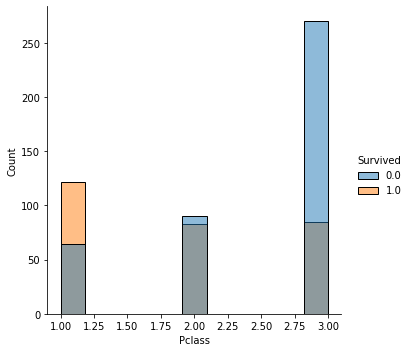

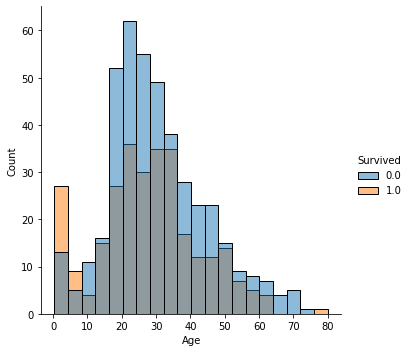

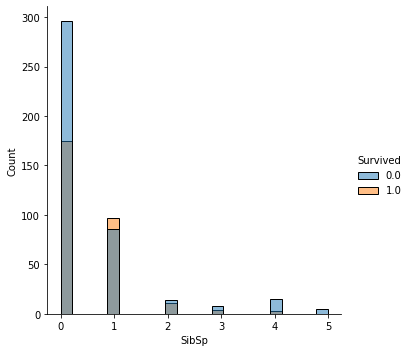

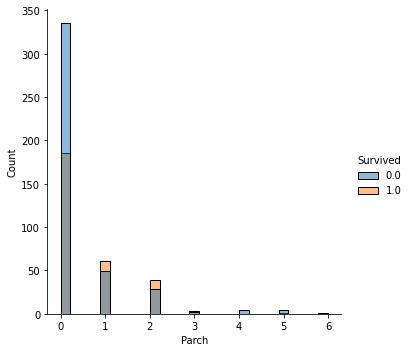

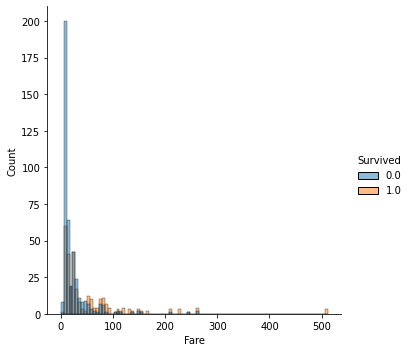

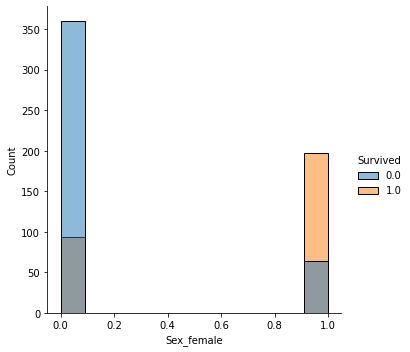

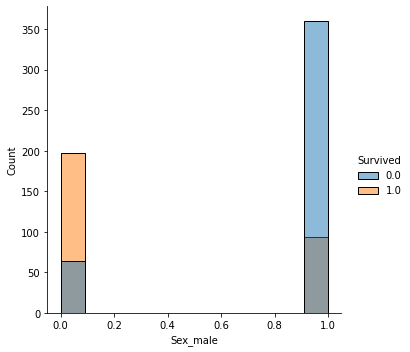

In [137]:
sns.displot(df, x="Pclass", hue='Survived')
sns.displot(df, x="Age", hue='Survived')
sns.displot(df, x="SibSp", hue='Survived')
sns.displot(df, x="Parch", hue='Survived')
sns.displot(df, x="Fare", hue='Survived')
sns.displot(df, x="Sex_female", hue='Survived')
sns.displot(df, x="Sex_male", hue='Survived')

##실험

우선 모든 parameter이 default인 basis 실험을 진행하여 basis model을 만들어서 fit, cross validation까지 모두 마친다.

그리고 각 Decision tree, logistic regression, mlp에 관한 실험을 진행할 것이다. 각 실험을 통해 parameter값에 변경을 주어 최적의 parameter을 가진 final model들을 도출해 낼것이다.



### Basis 실험
DecisionTreeClassifier(), LogisticRegression(), MLPClassifier() 모두 default setting으로 가되 이 데이터셋을 이용한 실험을 진행 할 시 LogisticRegression()과 MLPClassifier()모두 max_iter이 부족하다는 error message를 띄워 max_iter=10000인 모델을 basis model로 선정.

#### Split Data

In [138]:
# split data to X and y
y = df[["Survived"]]
X = df.drop(["Survived"],axis=1)

# split train, validation and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# check dimension
X_test.shape

(143, 7)

#### Build and Train Model
각자 세 모델을 build하고 train하며 마지막엔 validation accuracy (score)을 print한다.

Decision Tree

In [139]:
# build and train decision tree
from sklearn.tree import DecisionTreeClassifier

decTree = DecisionTreeClassifier()
decTree.fit(X_train, y_train)

# get validation accuracy
decTree.score(X_val, y_val)

0.7902097902097902

Logistic regression

In [140]:
# logistic regression model
from sklearn.linear_model import LogisticRegression
	
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train.values.ravel())

# model score
lr.score(X_val, y_val)

0.7902097902097902

MLP

In [141]:
# MLP
from sklearn.neural_network import MLPClassifier
	
mlp = MLPClassifier(max_iter=10000)
mlp.fit(X_train, y_train.values.ravel())

# model score
mlp.score(X_val, y_val)

0.7902097902097902

#### Validation report

In [156]:
# print classification report
from sklearn.metrics import classification_report

print("===decision tree===")
y_pred_d = decTree.predict(X_val)
print(classification_report(y_val, y_pred_d))

print("===logistic regression===")
y_pred_l = lr.predict(X_val)
print(classification_report(y_val, y_pred_l))

print("===mlp===")
y_pred_m = mlp.predict(X_val)
print(classification_report(y_val, y_pred_m))

===decision tree===
              precision    recall  f1-score   support

         0.0       0.76      0.87      0.81        75
         1.0       0.83      0.71      0.76        68

    accuracy                           0.79       143
   macro avg       0.80      0.79      0.79       143
weighted avg       0.79      0.79      0.79       143

===logistic regression===
              precision    recall  f1-score   support

         0.0       0.76      0.87      0.81        75
         1.0       0.83      0.71      0.76        68

    accuracy                           0.79       143
   macro avg       0.80      0.79      0.79       143
weighted avg       0.79      0.79      0.79       143

===mlp===
              precision    recall  f1-score   support

         0.0       0.78      0.83      0.81        75
         1.0       0.80      0.75      0.77        68

    accuracy                           0.79       143
   macro avg       0.79      0.79      0.79       143
weighted avg      

#### Cross validation

In [157]:
print("===decision tree===")
cv_results_d = cross_validate(decTree, X_train, y_train, cv=5)
print(np.mean(cv_results_d['test_score']))

print("===logistic regression===")
cv_results_l = cross_validate(lr, X_train, y_train.values.ravel(), cv=5)
print(np.mean(cv_results_l['test_score']))

print("===mlp===")
cv_results_m = cross_validate(mlp, X_train, y_train.values.ravel(), cv=5)
print(np.mean(cv_results_m['test_score']))

===decision tree===
0.7499042407660739
===logistic regression===
0.8061012311901505
===mlp===
0.8014227086183311


#### Final evaluation on test dataset

In [158]:
# print classification report
print("===decision tree===")
y_pred_test_d = decTree.predict(X_test)
print(classification_report(y_test, y_pred_test_d))

print("===logistic regression===")
y_pred_test_l = lr.predict(X_test)
print(classification_report(y_test, y_pred_test_l))

print("===mlp===")
y_pred_test_m = mlp.predict(X_test)
print(classification_report(y_test, y_pred_test_m))

===decision tree===
              precision    recall  f1-score   support

         0.0       0.78      0.79      0.78        87
         1.0       0.67      0.64      0.65        56

    accuracy                           0.73       143
   macro avg       0.72      0.72      0.72       143
weighted avg       0.73      0.73      0.73       143

===logistic regression===
              precision    recall  f1-score   support

         0.0       0.79      0.85      0.82        87
         1.0       0.73      0.64      0.69        56

    accuracy                           0.77       143
   macro avg       0.76      0.75      0.75       143
weighted avg       0.77      0.77      0.77       143

===mlp===
              precision    recall  f1-score   support

         0.0       0.76      0.77      0.77        87
         1.0       0.64      0.62      0.63        56

    accuracy                           0.71       143
   macro avg       0.70      0.70      0.70       143
weighted avg      

###Decision tree 실험
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

위의 링크에서 DecisionTreeClassifier의 parameter들을 확인해 볼 수 있다.

Decision tree에서 가장 자주 사용하고 효과적은 parameter 조정법은 바로 pruning인데 이는 거대한 decission tree의 크기를 조정함으로써 학습에 도움이 되지 않는 node들이 전체 학습 score에 영향을 끼치는 것을 줄인다.

Pruning할 때 조정이 되는 parameter들은 

*   max_leaf_nodes
*   max_depth
*   min_samples_split
*   min_samples_leaf

가 있으며 이번 실험에서는 이 네가지 parameter들 중 max_leaf_nodes와 max_depth를 각각 조정하는 두개의 model을 사용하여 각 parameter의 최적의 값을 찾아내고 그 최적의 값들을 모두 집어넣은 model의 성능이 과연 최적일지 까지 알아볼 것이다.

#### max_leaf_nodes

max_leaf_nodes를 [500, 250, 100, 50, 10, 5, 3]으로 각각 설정하여 5-fold cross validation을 진행해본 결과, *5*로 설정 된 것이 결과가 가장 좋았다. test_score들을 각각 비교해보았을 때 max_leaf_nodes들은 작아질수록 성능은 더 올라갔으나 너무 작아도 성능이 오히려 떨어지는 것을 볼 수 있었다.

In [159]:
max_leaf_nodes = [500, 250, 100, 50, 10, 5, 3]
for m in max_leaf_nodes:
    decTree_temp = DecisionTreeClassifier(max_leaf_nodes=m)
    cv_results = cross_validate(decTree_temp, X_train, y_train, cv=5)
    print('max_leaf_nodes: ',m)
    print(np.mean(cv_results['test_score']))

max_leaf_nodes:  500
0.7569630642954857
max_leaf_nodes:  250
0.7475786593707251
max_leaf_nodes:  100
0.7569904240766074
max_leaf_nodes:  50
0.7663201094391245
max_leaf_nodes:  10
0.8085362517099863
max_leaf_nodes:  5
0.8200547195622434
max_leaf_nodes:  3
0.7851162790697674


#### max_depth
max_depth또한 max_leaf_nodes와 동일하게 [500, 250, 100, 50, 10, 5, 3]으로 각각 설정하여 5-fold cross validation을 진행해본 결과, 내려갈수록 더 좋은 test_score을 보였으며 가장 높은 test_score을 보인 max_depth는 *3*이였다.

In [160]:
max_depth = [500, 250, 100, 50, 10, 5, 3, 1]
for m in max_depth:
    decTree_temp = DecisionTreeClassifier(max_depth=m)
    cv_results = cross_validate(decTree_temp, X_train, y_train, cv=5)
    print('max_depth: ',m)
    print(np.mean(cv_results['test_score']))

max_depth:  500
0.7639945280437757
max_depth:  250
0.7452530779753762
max_depth:  100
0.7475786593707251
max_depth:  50
0.7522298221614228
max_depth:  10
0.7779753761969903
max_depth:  5
0.7874418604651163
max_depth:  3
0.8294664842681259
max_depth:  1
0.7991244870041039


####max_leaf_nodes와 max_depth 모두 변경

제일 test_score이 높은 경우는 max_depth가 3이고 max_leaf_nodes가 10/50/100/250/500인 경우였다.

In [161]:
max_leaf_nodes = [500, 250, 100, 50, 10, 5, 3]
max_depth = [500, 250, 100, 50, 10, 5, 3, 1]

test_scores=[]

print('(max_depth, max_leaf_nodes):')
for m in max_depth:
    for n in max_leaf_nodes:
        decTree_temp = DecisionTreeClassifier(max_depth=m, max_leaf_nodes=n)
        cv_results = cross_validate(decTree_temp, X_train, y_train, cv=5)
        print('(',m,', ',n,') : ', np.mean(cv_results['test_score']))
        test_scores.append(np.mean(cv_results['test_score']))

test_scores.sort()
print("Best accuracy:", test_scores[-1])

(max_depth, max_leaf_nodes):
( 500 ,  500 ) :  0.7476060191518468
( 500 ,  250 ) :  0.752202462380301
( 500 ,  100 ) :  0.7522571819425445
( 500 ,  50 ) :  0.7616142270861833
( 500 ,  10 ) :  0.8085362517099863
( 500 ,  5 ) :  0.8200547195622434
( 500 ,  3 ) :  0.7851162790697674
( 250 ,  500 ) :  0.7639945280437757
( 250 ,  250 ) :  0.7428727770177839
( 250 ,  100 ) :  0.7499316005471957
( 250 ,  50 ) :  0.7710533515731874
( 250 ,  10 ) :  0.8085362517099863
( 250 ,  5 ) :  0.8200547195622434
( 250 ,  3 ) :  0.7851162790697674
( 100 ,  500 ) :  0.7616142270861833
( 100 ,  250 ) :  0.7639945280437757
( 100 ,  100 ) :  0.7499316005471957
( 100 ,  50 ) :  0.766374829001368
( 100 ,  10 ) :  0.8085362517099863
( 100 ,  5 ) :  0.8200547195622434
( 100 ,  3 ) :  0.7851162790697674
( 50 ,  500 ) :  0.7499042407660739
( 50 ,  250 ) :  0.7569357045143639
( 50 ,  100 ) :  0.7545554035567716
( 50 ,  50 ) :  0.7593160054719562
( 50 ,  10 ) :  0.8085362517099863
( 50 ,  5 ) :  0.8200547195622434
( 

####최종 실험 결과 비교 & 최종 모델 선정

Basis 실험에서 만든 basis 모델을 포함, 총 네가지의 모델을 생성하였다:
*   decTree : 모든 설정이 default인 decision tree
*   decTree_mln : max_leaf_nodes = 5인 decision tree
*   decTree_md : max_depth = 3인 decision tree
*   decTree_total : max_leaf_nodes = 5, max_depth = 3인 decision tree

각 트리에 대한 cross validation을 진행, 각각 test셋에 대한 성능을 평가해 본 결과, max_depth를 변화시킨 *decTree_md*와 둘 다 변화시킨 *decTree_total*이 가장 높은 성능을 보였고 본 연구에선 **decTree_total**을 최종 모델로 선정할 것이다.

In [162]:
decTree_mln = DecisionTreeClassifier(max_leaf_nodes=5)
decTree_mln.fit(X_train, y_train)
decTree_md = DecisionTreeClassifier(max_depth=3)
decTree_md.fit(X_train, y_train)
decTree_total = DecisionTreeClassifier(max_leaf_nodes=100, max_depth=3)
decTree_total.fit(X_train, y_train)

decTrees = [decTree, decTree_mln, decTree_md, decTree_total]
for d in decTrees:
    print("=====================================================")
    y_pred_train = d.predict(X_train)
    print(classification_report(y_train, y_pred_train))
    cv_results = cross_validate(d, X_train, y_train, cv=5)
    print(np.mean(cv_results['test_score']))


              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       262
         1.0       1.00      0.98      0.99       166

    accuracy                           0.99       428
   macro avg       0.99      0.99      0.99       428
weighted avg       0.99      0.99      0.99       428

0.7475512995896033
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87       262
         1.0       0.83      0.73      0.78       166

    accuracy                           0.84       428
   macro avg       0.84      0.82      0.83       428
weighted avg       0.84      0.84      0.84       428

0.8200547195622434
              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88       262
         1.0       0.85      0.72      0.78       166

    accuracy                           0.84       428
   macro avg       0.85      0.82      0.83       428
weighted avg       0.84      0.84   

###Logistic regreesion 실험
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

위의 링크에서 LogisticRegression의 parameter들을 확인해 볼 수 있다.

본 실험에서는 LogisticRegression의 parameter들 중 C와 Solver를 조정해볼 것이다.

#### C

C를 [0.001,0.01,0.1,1,10,100] 으로 다양하게 변화를 준 결과 C가 *10* 또는 *100*인 경우가 test_score이 가장 높았다. 본 연구에서는 C를 *10*으로 설정하여 사용할 것이다.


In [ ]:
c_range = [0.001,0.01,0.1,1,10,100]
for c in c_range:
    lr_temp = LogisticRegression(max_iter=1000, C=c)
    cv_results = cross_validate(lr_temp, X_train, y_train.values.ravel(), cv=5)
    print('c: ',c)
    print(np.mean(cv_results['test_score']))

####Solver
Solver parameter은 아무런 값도 주어지지않았을 때에 'lbfgs'가 default값이다. 따라서 'lbfgs'를 제외한 나머지 ['newton-cg', 'liblinear', 'sag', 'saga']에 따라 각각 진행해본 결과, 'newton-cg'를 이용한 모델의 값이 가장 좋았다.

In [ ]:
solver = ['newton-cg','liblinear','sag','saga']
for p in solver:
    lr_temp = LogisticRegression(max_iter=10000,solver=p)
    cv_results = cross_validate(lr_temp, X_train, y_train.values.ravel(), cv=5)
    print('solver: ',p)
    print(np.mean(cv_results['test_score']))

####C와 Solver 모두 변경

제일 test_score이 높은 경우는 (C, Solver)이 ( 10 ,  newton-cg )/( 100 ,  newton-cg )/( 100 ,  liblinear ) 인 경우였고, 이 연구에선 위의 선택들과 상반되는 값을 이용하기 위하여 ( 100 ,  liblinear )을 이용하겠다.

In [146]:
c_range = [0.001,0.01,0.1,1,10,100]
solver = ['newton-cg','liblinear','sag','saga']

test_scores=[]

print('(C, Solver):')
for c in c_range:
    for s in solver:
        lr_temp = LogisticRegression(max_iter=10000, C=c,solver=s)
        cv_results = cross_validate(lr_temp, X_train, y_train.values.ravel(), cv=5)
        print('(',c,', ',s,') : ', np.mean(cv_results['test_score']))
        test_scores.append(np.mean(cv_results['test_score']))

test_scores.sort()
print("Best accuracy:", test_scores[-1])

(C, Solver):
( 0.001 ,  newton-cg ) :  0.6728043775649796
( 0.001 ,  liblinear ) :  0.6821614227086183
( 0.001 ,  sag ) :  0.684514363885089
( 0.001 ,  saga ) :  0.684514363885089
( 0.01 ,  newton-cg ) :  0.7312722298221613
( 0.01 ,  liblinear ) :  0.7242407660738713
( 0.01 ,  sag ) :  0.7219151846785226
( 0.01 ,  saga ) :  0.7219151846785226
( 0.1 ,  newton-cg ) :  0.7943638850889192
( 0.1 ,  liblinear ) :  0.7873050615595074
( 0.1 ,  sag ) :  0.787359781121751
( 0.1 ,  saga ) :  0.7943638850889192
( 1 ,  newton-cg ) :  0.8061012311901505
( 1 ,  liblinear ) :  0.7990697674418604
( 1 ,  sag ) :  0.7826812585499315
( 1 ,  saga ) :  0.780328317373461
( 10 ,  newton-cg ) :  0.8084541723666211
( 10 ,  liblinear ) :  0.80374829001368
( 10 ,  sag ) :  0.7873871409028728
( 10 ,  saga ) :  0.780328317373461
( 100 ,  newton-cg ) :  0.8084541723666211
( 100 ,  liblinear ) :  0.8084541723666211
( 100 ,  sag ) :  0.7873871409028728
( 100 ,  saga ) :  0.780328317373461
Best accuracy: 0.808454172366

####최종 실험 결과 비교 & 최종 모델 선정
Basis 실험에서 만든 basis 모델을 포함, 총 네가지의 모델을 생성하였다:
*   lr : 모든 설정이 default인 logistic regression
*   lr_c : C=10인 logistic regression
*   lr_s : solver='newton-cg'인 logistic regression
*   lr_total : C=100, solver='liblinear'인 logistic regression

각 트리에 대한 cross validation을 진행, 각각 test셋에 대한 성능을 평가해 본 결과, C를 변화시킨 *lr_c*와 둘 다 변화시킨 *lr_total*이 가장 높은 성능을 보였고 본 연구에선 **lr_total**을 최종 모델로 선정할 것이다.

In [165]:
lr_c = LogisticRegression(max_iter=10000,C=10)
lr_c.fit(X_train, y_train.values.ravel())
lr_s = LogisticRegression(max_iter=10000, solver='newton-cg')
lr_s.fit(X_train, y_train.values.ravel())
lr_total = LogisticRegression(max_iter=10000, C=100, solver='liblinear')
lr_total.fit(X_train, y_train.values.ravel())

lrs = [lr, lr_c, lr_s, lr_total]
for l in lrs:
    print("=====================================================")
    y_pred_train = l.predict(X_train)
    print(classification_report(y_train, y_pred_train))
    cv_results = cross_validate(l, X_train, y_train.values.ravel(), cv=5)
    print(np.mean(cv_results['test_score']))

              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       262
         1.0       0.80      0.71      0.75       166

    accuracy                           0.82       428
   macro avg       0.81      0.80      0.80       428
weighted avg       0.82      0.82      0.82       428

0.8061012311901505
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.86       262
         1.0       0.79      0.72      0.75       166

    accuracy                           0.82       428
   macro avg       0.81      0.80      0.80       428
weighted avg       0.82      0.82      0.82       428

0.8084541723666211
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       262
         1.0       0.80      0.71      0.75       166

    accuracy                           0.82       428
   macro avg       0.81      0.80      0.80       428
weighted avg       0.82      0.82   

###MLP 실험
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

위의 링크에서 MLPClassifier의 parameter들을 확인해 볼 수 있다.

본 실험에서는 MLPClassifier의 parameter들 중 hidden_layer_sizes와 alpha를 조정해볼 것이다.

#### hidden_layer_sizes

hidden_layer_sizes를 hidden_layers = [(50,50,50), (50,100,50), (200,), (100, 2), (30, )] 으로 다양하게 변화를 준 결과 (default = (100, )), hidden_layer_sizes가 *(200, )*인 경우가 test_score이 가장 높았다. 


In [169]:
hidden_layers = [(50,50,50), (50,100,50), (200,), (100, 2), (30, )]
for h in hidden_layers:
    mlp_temp = MLPClassifier(max_iter=10000, hidden_layer_sizes=h)
    cv_results = cross_validate(mlp_temp, X_train, y_train.values.ravel(), cv=5)
    print('hidden_layer_sizes: ',h)
    print(np.mean(cv_results['test_score']))

hidden_layer_sizes:  (50, 50, 50)
0.7921203830369358
hidden_layer_sizes:  (50, 100, 50)
0.7943365253077975
hidden_layer_sizes:  (200,)
0.7967441860465116
hidden_layer_sizes:  (100, 2)
0.7850341997264022
hidden_layer_sizes:  (30,)
0.794391244870041


####Alpha
Solver parameter은 아무런 값도 주어지지않았을 때에 0.0001가 default값이다. 따라서 0.0001를 제외한 나머지 [1.0, 0.5, 0.1, 0.01]에 따라 각각 진행해본 결과, alpha = 0.5인 모델의 성능이 가장 훌륭했다.

In [170]:
alpha = [1.0, 0.5, 0.1, 0.01]
for a in alpha:
    mlp_temp = MLPClassifier(max_iter=10000, alpha=a)
    cv_results = cross_validate(mlp_temp, X_train, y_train.values.ravel(), cv=5)
    print('alpha: ',a)
    print(np.mean(cv_results['test_score']))

alpha:  1.0
0.7967441860465116
alpha:  0.5
0.7990971272229822
alpha:  0.1
0.7851162790697674
alpha:  0.01
0.7944186046511628


####hidden_layer_sizes와 alpha 모두 변경

제일 test_score이 높은 경우는 ( (30,) ,  0.01 ) 인 경우였고, 이를 이용하여 mlp_total을 만들 것이다.

In [171]:
hidden_layers = [(50,50,50), (50,100,50), (200,), (100, 2), (30, )]
alpha = [1.0, 0.5, 0.1, 0.01]

test_scores=[]

print('(hidden_layer_sizes, alpha):')
for h in hidden_layers:
    for a in alpha:
        mlp_temp = MLPClassifier(max_iter=10000, hidden_layer_sizes=h, alpha=a)
        cv_results = cross_validate(mlp_temp, X_train, y_train.values.ravel(), cv=5)
        print('(',h,', ',a,') : ', np.mean(cv_results['test_score']))
        test_scores.append(np.mean(cv_results['test_score']))

test_scores.sort()
print("Best accuracy:", test_scores[-1])

(hidden_layer_sizes, alpha):
( (50, 50, 50) ,  1.0 ) :  0.7898221614227087
( (50, 50, 50) ,  0.5 ) :  0.8038577291381669
( (50, 50, 50) ,  0.1 ) :  0.8037209302325582
( (50, 50, 50) ,  0.01 ) :  0.7710259917920658
( (50, 100, 50) ,  1.0 ) :  0.7851436388508892
( (50, 100, 50) ,  0.5 ) :  0.7921203830369357
( (50, 100, 50) ,  0.1 ) :  0.7780574555403558
( (50, 100, 50) ,  0.01 ) :  0.8083994528043774
( (200,) ,  1.0 ) :  0.7851162790697674
( (200,) ,  0.5 ) :  0.7826812585499316
( (200,) ,  0.1 ) :  0.7967441860465116
( (200,) ,  0.01 ) :  0.7966621067031464
( (100, 2) ,  1.0 ) :  0.6865663474692203
( (100, 2) ,  0.5 ) :  0.7967168262653898
( (100, 2) ,  0.1 ) :  0.7920930232558139
( (100, 2) ,  0.01 ) :  0.7735704514363885
( (30,) ,  1.0 ) :  0.7874145006839945
( (30,) ,  0.5 ) :  0.7874418604651163
( (30,) ,  0.1 ) :  0.7944186046511627
( (30,) ,  0.01 ) :  0.8083994528043776
Best accuracy: 0.8083994528043776


####최종 실험 결과 비교 & 최종 모델 선정
Basis 실험에서 만든 basis 모델을 포함, 총 네가지의 모델을 생성하였다:
*   mlp : 모든 설정이 default인 MLP
*   mlp_h : hidden_layer_sizes = (200, )인 MLP
*   mlp_a : alhpa=0.5인 MLP
*   mlp_total : hidden_layers_sizes = (30, ), alpha = 0.01인 MLP

각 트리에 대한 cross validation을 진행, 각각 test셋에 대한 성능을 평가해 본 결과, hidden_layer_sizes를 변화시킨 *mlp_h*가 가장 높은 성능을 보였고 본 연구에선 이를 최종 모델로 선정할 것이다.

In [173]:
mlp_h = MLPClassifier(max_iter=10000,hidden_layer_sizes=(200,))
mlp_h.fit(X_train, y_train.values.ravel())
mlp_a = MLPClassifier(max_iter=10000, alpha=0.5)
mlp_a.fit(X_train, y_train.values.ravel())
mlp_total = MLPClassifier(max_iter=10000, hidden_layer_sizes=(30,),alpha=0.01)
mlp_total.fit(X_train, y_train.values.ravel())

mlps = [mlp, mlp_h, mlp_a, mlp_total]
for m in mlps:
    print("=====================================================")
    y_pred_train = m.predict(X_train)
    print(classification_report(y_train, y_pred_train))
    cv_results = cross_validate(m, X_train, y_train.values.ravel(), cv=5)
    print(np.mean(cv_results['test_score']))

              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85       262
         1.0       0.76      0.76      0.76       166

    accuracy                           0.81       428
   macro avg       0.80      0.80      0.80       428
weighted avg       0.81      0.81      0.81       428

0.773515731874145
              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85       262
         1.0       0.80      0.67      0.73       166

    accuracy                           0.81       428
   macro avg       0.81      0.78      0.79       428
weighted avg       0.81      0.81      0.80       428

0.8037756497948016
              precision    recall  f1-score   support

         0.0       0.83      0.84      0.84       262
         1.0       0.75      0.72      0.73       166

    accuracy                           0.80       428
   macro avg       0.79      0.78      0.78       428
weighted avg       0.80      0.80    

##최종 결과 비교
위에서 final로 선정된 **decTree_total**, **lr_total**, **mlp_h**의 test datatset에 대한 최종 결과 비교이다.

X_test와 y_test로 score을 비교해 본 결과, decision tree의 final model이 가장 높은 score을 보였다.


In [176]:
print("=====================================================")
print("Final decision tree model: \n",decTree_total)
print(decTree_total.score(X_test, y_test))

print("=====================================================")
print("Final logistic regression model:\n", lr_total)
print(lr_total.score(X_test, y_test))

print("=====================================================")
print("Final MLP model:\n", mlp_h)
print(mlp_h.score(X_test, y_test))

Final decision tree model: 
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=100,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
0.7832167832167832
Final logistic regression model:
 LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
0.7622377622377622
Final MLP model:
 MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False